In [2]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.patches as patches
plt.rcParams.update({'font.size': 6})

In [3]:
file=fits.open('20240220_det_500040_5_NA_-600_0.372_9_bkg_1000_9.97_run_1.fits')

In [4]:
file.info()

Filename: 20240220_det_500040_5_NA_-600_0.372_9_bkg_1000_9.97_run_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     17   128000R x 4C   [J, I, I, I]   


In [5]:
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [6]:
file[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10 / length of dimension 1                          
NAXIS2  =               128000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'time    '                                                            
TFORM1  = 'J       '                                                            
TZERO1  =           2147483648                                                  
TTYPE2  = 'detid   '                                                            
TFORM2  = 'I       '        

In [7]:
file[1].columns

ColDefs(
    name = 'time'; format = 'J'; bzero = 2147483648
    name = 'detid'; format = 'I'
    name = 'pixid'; format = 'I'
    name = 'pha'; format = 'I'
)

In [8]:
file_data=file[1].data

In [9]:
detector=file_data['detid']
time=file_data['time']
pixid=file_data['pixid']
pha=file_data['pha']
detector

array([1, 1, 1, ..., 1, 1, 1], dtype='>i2')

In [10]:
unq_val, counts=np.unique(detector, return_counts=True)

In [11]:
count0=dict()
count1=dict()

In [12]:
for i in range(len(detector)):
    pixval = pixid[i]
    if detector[i] == 0:
        if pixval not in count0:
            count0[pixval] = 0
        count0[pixval] += 1
    else:
        if pixval not in count1:
            count1[pixval] = 0
        count1[pixval] += 1

In [13]:
det1=[]
for i in range(256):
    if i in list(count1.keys()):
        det1.append(count1[i])
    else:
        det1.append(0)

nparr=np.array(det1)
nparr=nparr.reshape((16,16))

In [14]:
def replace_outliers_with_zero(arr):
    q1, q3 = np.percentile(arr, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    middle=(lower_bound+upper_bound)/2
    arr[(arr > upper_bound)] = 0
    return arr

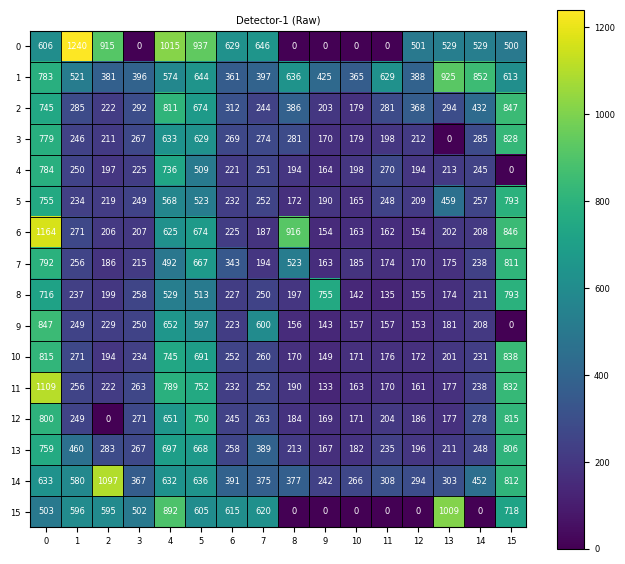

/tmp/ipykernel_12031/30818411.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  el=int(nparr.reshape(-1,1)[i])


<Figure size 400x300 with 0 Axes>

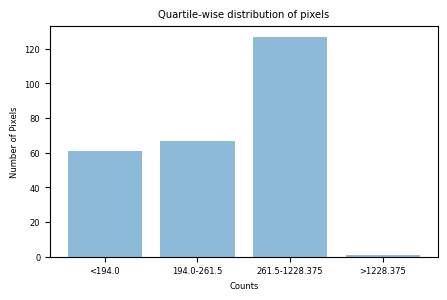

Text(0, 0.5, 'Counts')

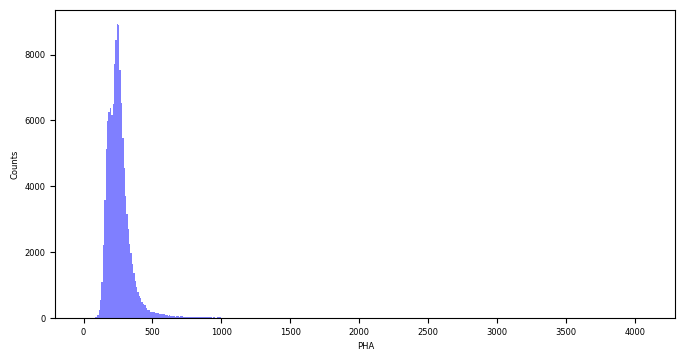

In [23]:
plt.figure(figsize=(8, 7))
plt.imshow(nparr, cmap='viridis', interpolation='nearest')
plt.grid(which='both', color='gray', linestyle='-', linewidth=0)
plt.xticks(np.arange(16), np.arange(16))
plt.yticks(np.arange(16), np.arange(16))
plt.title('Detector-1 (Raw)')
plt.colorbar()
for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        plt.text(j, i, str(nparr[i, j]), ha='center', va='center', color='white', fontsize=6)  # Change fontsize here

for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)

plt.show()

q1, q2, q3 = np.percentile(nparr, [25, 50, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
first=[]
second=[]
third=[]
fourth=[]
for i in range(len(nparr.reshape(-1,1))):
    el=int(nparr.reshape(-1,1)[i])
    if el<q1:
        first.append(el)
    elif q1<=el<q2:
        second.append(el)
    elif q2<=el<=upper_bound:
        third.append(el)
    else:
        fourth.append(el)
plt.figure(figsize=(4, 3))
lengths = [len(first), len(second), len(third), len(fourth)]
lists = [f'<{q1}', f'{q1}-{q2}', f'{q2}-{upper_bound}', f'>{upper_bound}']
plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 6})

# Create the bar chart
plt.bar(lists, lengths, align='center', alpha=0.5)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.title('Quartile-wise distribution of pixels')

# Show the plot
plt.show()

plt.figure(figsize=(8,4))
plt.hist(pha, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

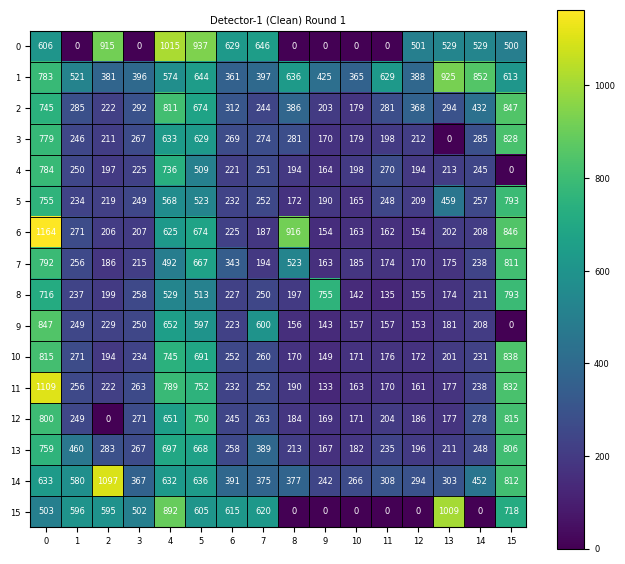

/tmp/ipykernel_12031/3452894260.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  el=int(nparr.reshape(-1,1)[i])


<Figure size 400x300 with 0 Axes>

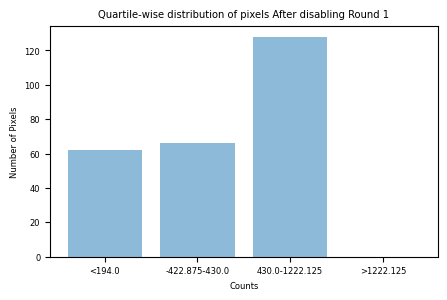

Text(0, 0.5, 'Counts')

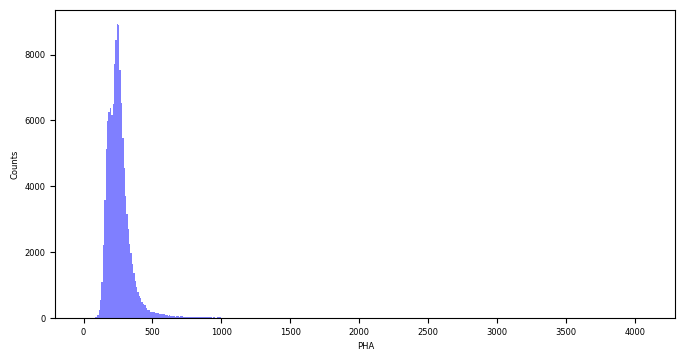

In [24]:
nparr=replace_outliers_with_zero(nparr)

plt.figure(figsize=(8, 7))
plt.imshow(nparr, cmap='viridis', interpolation='nearest')
plt.grid(which='both', color='gray', linestyle='-', linewidth=0)
plt.xticks(np.arange(16), np.arange(16))
plt.yticks(np.arange(16), np.arange(16))
plt.title('Detector-1 (Clean) Round 1')
plt.colorbar()
for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        plt.text(j, i, str(nparr[i, j]), ha='center', va='center', color='white', fontsize=6)  # Change fontsize here

for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)

plt.show()

q1, q2, q3 = np.percentile(nparr, [25, 50, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
first=[]
second=[]
third=[]
fourth=[]
for i in range(len(nparr.reshape(-1,1))):
    el=int(nparr.reshape(-1,1)[i])
    if el<q1:
        first.append(el)
    elif q1<=el<q2:
        second.append(el)
    elif q2<=el<=upper_bound:
        third.append(el)
    else:
        fourth.append(el)
plt.figure(figsize=(4, 3))
lengths = [len(first), len(second), len(third), len(fourth)]
lists = [f'<{q1}', f'{lower_bound}-{middle}', f'{middle}-{upper_bound}', f'>{upper_bound}']
plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 6})

# Create the bar chart
plt.bar(lists, lengths, align='center', alpha=0.5)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.title('Quartile-wise distribution of pixels After disabling Round 1')

# Show the plot
plt.show()

plt.figure(figsize=(8,4))
plt.hist(pha, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

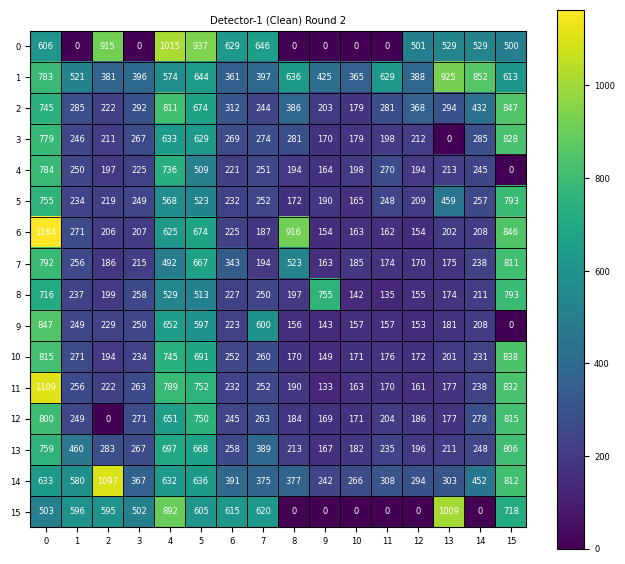

/tmp/ipykernel_12031/330438826.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  el=int(nparr.reshape(-1,1)[i])


<Figure size 400x300 with 0 Axes>

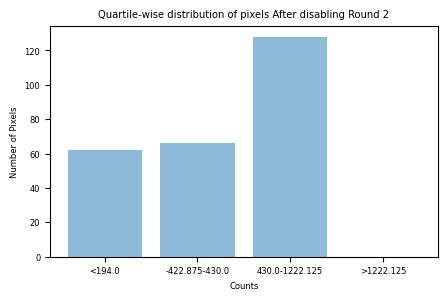

Text(0, 0.5, 'Counts')

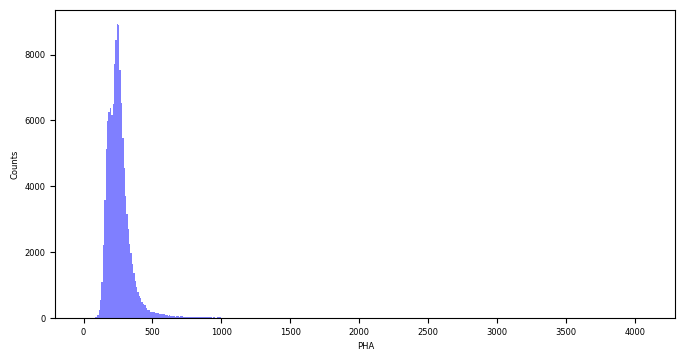

In [25]:
nparr=replace_outliers_with_zero(nparr)

plt.figure(figsize=(8, 7))
plt.imshow(nparr, cmap='viridis', interpolation='nearest')
plt.grid(which='both', color='gray', linestyle='-', linewidth=0)
plt.xticks(np.arange(16), np.arange(16))
plt.yticks(np.arange(16), np.arange(16))
plt.title('Detector-1 (Clean) Round 2')
plt.colorbar()
for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        plt.text(j, i, str(nparr[i, j]), ha='center', va='center', color='white', fontsize=6)  # Change fontsize here

for i in range(len(nparr)):
    for j in range(len(nparr[0])):
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)

plt.show()

q1, q2, q3 = np.percentile(nparr, [25, 50, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
first=[]
second=[]
third=[]
fourth=[]
for i in range(len(nparr.reshape(-1,1))):
    el=int(nparr.reshape(-1,1)[i])
    if el<q1:
        first.append(el)
    elif q1<=el<q2:
        second.append(el)
    elif q2<=el<=upper_bound:
        third.append(el)
    else:
        fourth.append(el)
plt.figure(figsize=(4, 3))
lengths = [len(first), len(second), len(third), len(fourth)]
lists = [f'<{q1}', f'{lower_bound}-{middle}', f'{middle}-{upper_bound}', f'>{upper_bound}']
plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 6})

# Create the bar chart
plt.bar(lists, lengths, align='center', alpha=0.5)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.title('Quartile-wise distribution of pixels After disabling Round 2')

# Show the plot
plt.show()

plt.figure(figsize=(8,4))
plt.hist(pha, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")